# Bank Loan Exploratory data analysis (EDA)

Workflow:
1. Import Libraries
2. Explore Data
3. Checking Data Quality
4. Visualization
5. Preprocessing data
6. Remove Unnecessary Features

## 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro
import warnings
import os
from pathlib import Path
from MLProject import logger

In [2]:
if Path(os.getcwd()) != Path('d:/Code Workspace/Personal Project/Personal Project - End to End Loan Status Classification'):
    os.chdir('../')
%pwd

'd:\\Code Workspace\\Personal Project\\Personal Project - End to End Loan Status Classification'

## 2. Explore Data

In [3]:
df = pd.read_csv("artifacts\data_ingestion\credit_train.csv")

In [4]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [5]:
col = df.columns.str.replace(' ', '_')
df.columns = col

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan_ID                       100000 non-null  object 
 1   Customer_ID                   100000 non-null  object 
 2   Loan_Status                   100000 non-null  object 
 3   Current_Loan_Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit_Score                  80846 non-null   float64
 6   Annual_Income                 80846 non-null   float64
 7   Years_in_current_job          95778 non-null   object 
 8   Home_Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly_Debt                  100000 non-null  float64
 11  Years_of_Credit_History       100000 non-null  float64
 12  Months_since_last_delinquent  46859 non-null

In [7]:
df.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Current_Loan_Amount,100000.000000,11760447.389460,31783942.546075,10802.000000,179652.000000,312246.000000,524942.000000,99999999.000000
Credit_Score,80846.000000,1076.456089,1475.403791,585.000000,705.000000,724.000000,741.000000,7510.000000
Annual_Income,80846.000000,1378276.559842,1081360.195662,76627.000000,848844.000000,1174162.000000,1650663.000000,165557393.000000
Monthly_Debt,100000.000000,18472.412336,12174.992609,0.000000,10214.162500,16220.300000,24012.057500,435843.280000
Years_of_Credit_History,100000.000000,18.199141,7.015324,3.600000,13.500000,16.900000,21.700000,70.500000
Months_since_last_delinquent,46859.000000,34.901321,21.997829,0.000000,16.000000,32.000000,51.000000,176.000000
Number_of_Open_Accounts,100000.000000,11.128530,5.009870,0.000000,8.000000,10.000000,14.000000,76.000000
Number_of_Credit_Problems,100000.000000,0.168310,0.482705,0.000000,0.000000,0.000000,0.000000,15.000000
Current_Credit_Balance,100000.000000,294637.382350,376170.934666,0.000000,112670.000000,209817.000000,367958.750000,32878968.000000
Maximum_Open_Credit,99998.000000,760798.381748,8384503.472368,0.000000,273438.000000,467874.000000,782958.000000,1539737892.000000


In [8]:
df.describe(include = 'O').T

,count,unique,top,freq
Loan_ID,100000,81999,14dd8831-6af5-400b-83ec-68e61888a048,2
Customer_ID,100000,81999,981165ec-3274-42f5-a3b4-d104041a9ca9,2
Loan_Status,100000,2,Fully Paid,77361
Term,100000,2,Short Term,72208
Years_in_current_job,95778,11,10+ years,31121
Home_Ownership,100000,4,Home Mortgage,48410
Purpose,100000,16,Debt Consolidation,78552


In [9]:
# Defining the categorical and numerical feature
identifier = ['Loan_ID', 'Customer_ID']
columns_use = df.drop(identifier, axis = 1).columns
categorical_features = [feature for feature in columns_use if df[feature].dtype == 'O']
numeric_features = [feature for feature in columns_use if feature not in categorical_features]

# Printing the numerical and categorical feature
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')
print(f'We have {len(categorical_features)} categorical features : {categorical_features}')
print(f"We have {len(identifier)} identifier features : {identifier}")

We have 12 numerical features : ['Current_Loan_Amount', 'Credit_Score', 'Annual_Income', 'Monthly_Debt', 'Years_of_Credit_History', 'Months_since_last_delinquent', 'Number_of_Open_Accounts', 'Number_of_Credit_Problems', 'Current_Credit_Balance', 'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens']
We have 5 categorical features : ['Loan_Status', 'Term', 'Years_in_current_job', 'Home_Ownership', 'Purpose']
We have 2 identifier features : ['Loan_ID', 'Customer_ID']


In [10]:
# Checking the values of each unique value on the categorical feature
for feature in categorical_features:
    print(f"We have {df[feature].nunique()} unique value on {feature}:\n{df[feature].unique()}\n")

We have 2 unique value on Loan_Status:
['Fully Paid' 'Charged Off' nan]

We have 2 unique value on Term:
['Short Term' 'Long Term' nan]

We have 11 unique value on Years_in_current_job:
['8 years' '10+ years' '3 years' '5 years' '< 1 year' '2 years' '4 years'
 '9 years' '7 years' '1 year' nan '6 years']

We have 4 unique value on Home_Ownership:
['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage' nan]

We have 16 unique value on Purpose:
['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'Take a Trip' 'Other'
 'small_business' 'Medical Bills' 'wedding' 'vacation'
 'Educational Expenses' 'moving' 'renewable_energy' nan]



## 3. Checking Data Quality

### 3.1 Duplicates Data

In [11]:
df.duplicated().sum()

10728

In [12]:
duplicated_rows = df[df.duplicated(keep=False)]
duplicated_rows.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
17,24e8c8bd-d10b-4dac-8b81-1da470ff5ecb,967e8733-7189-49b7-a3ab-6a1d0e1abdac,Fully Paid,666204.0,Long Term,723.0,1821967.0,10+ years,Home Mortgage,Debt Consolidation,17612.24,22.0,34.0,15.0,0.0,813694.0,2004618.0,0.0,0.0
25,578c8e10-3214-4491-bdbc-b1695ef8ff87,cbe53e22-ba67-4eaf-a4fb-c5acdd12ec66,Fully Paid,465410.0,Long Term,688.0,1722654.0,3 years,Rent,Buy House,15647.45,22.3,30.0,7.0,0.0,107559.0,488356.0,0.0,0.0
37,d6946f18-5e64-41e6-ba92-ebff21fc5cee,d1d8497b-90bf-48ea-a8b1-40c909ab1f97,Fully Paid,161172.0,Short Term,720.0,796499.0,8 years,Home Mortgage,Debt Consolidation,3404.99,22.6,NaN,6.0,1.0,114095.0,170038.0,0.0,0.0


In [13]:
df.drop_duplicates(inplace= True)

In [14]:
df.duplicated().sum()

0

### 3.2 Missing Values

In [15]:
df.isnull().sum()

Loan_ID                             1
Customer_ID                         1
Loan_Status                         1
Current_Loan_Amount                 1
Term                                1
Credit_Score                    19155
Annual_Income                   19155
Years_in_current_job             3803
Home_Ownership                      1
Purpose                             1
Monthly_Debt                        1
Years_of_Credit_History             1
Months_since_last_delinquent    48338
Number_of_Open_Accounts             1
Number_of_Credit_Problems           1
Current_Credit_Balance              1
Maximum_Open_Credit                 3
Bankruptcies                      191
Tax_Liens                          10
dtype: int64

In [16]:
# Concatenate Count and Percentage columns with appropriate formatting
result = pd.concat(
    [
        df.isnull().sum(),
        (df.isnull().sum() / len(df) * 100).apply(lambda x: f"{x:.2f}").astype('float')
    ],
    axis=1,
    keys=['Count', 'Percentage']
)
# Identify columns with less than 5-10% missing values, mark them for imputation
result.loc[result['Percentage'].astype('float') >= 10, 'Strategy'] = 'Imputation'

# Identify columns with less than 50% missing values, mark them for dropping null values
result.loc[result['Percentage'].astype('float') < 10, 'Strategy'] = 'Drop Null Values'

# Identify columns with more than 50% missing values, mark them for dropping the entire feature
result.loc[result['Percentage'].astype('float') >= 50, 'Strategy'] = 'Drop Feature'
result

,Count,Percentage,Strategy
Loan_ID,1,0.00,Drop Null Values
Customer_ID,1,0.00,Drop Null Values
Loan_Status,1,0.00,Drop Null Values
Current_Loan_Amount,1,0.00,Drop Null Values
Term,1,0.00,Drop Null Values
Credit_Score,19155,21.33,Imputation
Annual_Income,19155,21.33,Imputation
Years_in_current_job,3803,4.24,Drop Null Values
Home_Ownership,1,0.00,Drop Null Values
Purpose,1,0.00,Drop Null Values


In [17]:
def identify_missing_strategies_optimized(df, drop_threshold=50, imputation_threshold=10):
    # Count missing values
    missing_counts = df.isnull().sum()

    # Percentage of missing values
    missing_percentage = (missing_counts / len(df) * 100).astype('float')

    # Identify columns for each strategy
    drop_feature_columns = missing_counts[missing_percentage >= drop_threshold].index.tolist()
    imputation_columns = missing_counts[(missing_percentage < drop_threshold) & (missing_percentage >= imputation_threshold)].index.tolist()
    drop_null_value_columns = missing_counts[missing_percentage < imputation_threshold].index.tolist()

    return drop_feature_columns, drop_null_value_columns, imputation_columns

In [18]:
drop_feature_columns, drop_null_value_columns, imputation_columns = identify_missing_strategies_optimized(df)

In [19]:
print(f"We gonna use drop feature strategy on: {drop_feature_columns}")
print(f"We gonna use imputation strategy on: {imputation_columns}")
print(f"We gonna use drop null value strategy on: {drop_null_value_columns}")

We gonna use drop feature strategy on: ['Months_since_last_delinquent']
We gonna use imputation strategy on: ['Credit_Score', 'Annual_Income']
We gonna use drop null value strategy on: ['Loan_ID', 'Customer_ID', 'Loan_Status', 'Current_Loan_Amount', 'Term', 'Years_in_current_job', 'Home_Ownership', 'Purpose', 'Monthly_Debt', 'Years_of_Credit_History', 'Number_of_Open_Accounts', 'Number_of_Credit_Problems', 'Current_Credit_Balance', 'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens']


In [20]:
df.drop(drop_feature_columns, axis=1, inplace=True)
numeric_features = [x for x in numeric_features if x not in drop_feature_columns]
categorical_features = [x for x in categorical_features if x not in drop_feature_columns]

In [21]:
numeric_features

['Current_Loan_Amount',
 'Credit_Score',
 'Annual_Income',
 'Monthly_Debt',
 'Years_of_Credit_History',
 'Number_of_Open_Accounts',
 'Number_of_Credit_Problems',
 'Current_Credit_Balance',
 'Maximum_Open_Credit',
 'Bankruptcies',
 'Tax_Liens']

In [22]:
df.shape

(89786, 18)

In [23]:
df.dropna(subset= drop_null_value_columns, inplace= True)

In [24]:
def impute_based_on_distribution(data, imputation_strategy='mean', alpha=0.05):
    # Suppress the warning for the Shapiro-Wilk test
    warnings.filterwarnings("ignore", category=UserWarning)

    # Determine if the distribution is normal
    stat, p_value = shapiro(data.dropna())
    is_normal = p_value > alpha

    # Choose imputation strategy based on distribution
    if is_normal:
        imputer = SimpleImputer(strategy=imputation_strategy)
        imputed_data = imputer.fit_transform(data)
        print(f"{data.name} imputed with {imputation_strategy}")
    else:
        imputed_data = data.fillna(data.median())
        print(f"{data.name} imputed with median")

    return imputed_data

In [25]:
def impute_missing_values(df, columns: list, categorical_features: list):
    for column in columns:
        if column in categorical_features:
            imputer = SimpleImputer(strategy= 'most_frequent')
            df[columns] = imputer.fit_transform(df[columns])
            print(f"{column} imputed with most frequent value")
        else:
            df[column] = impute_based_on_distribution(df[column])
    return df

In [26]:
df = impute_missing_values(df, imputation_columns, categorical_features)

Credit_Score imputed with median
Annual_Income imputed with median


In [27]:
pd.concat(
    [
        df.isnull().sum(),
        (df.isnull().sum() / len(df) * 100).apply(lambda x: f"{x:.2f}").astype('float')
    ],
    axis=1,
    keys=['Count', 'Percentage']
)

,Count,Percentage
Loan_ID,0,0.0
Customer_ID,0,0.0
Loan_Status,0,0.0
Current_Loan_Amount,0,0.0
Term,0,0.0
Credit_Score,0,0.0
Annual_Income,0,0.0
Years_in_current_job,0,0.0
Home_Ownership,0,0.0
Purpose,0,0.0


In [28]:
df.isnull().sum().sum()

0

## 4. Visualization

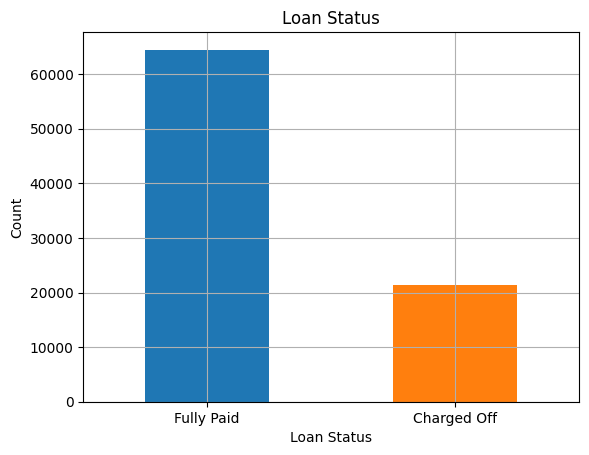

In [29]:
df['Loan_Status'].value_counts().plot(kind='bar', 
                                      title='Loan Status', 
                                      ylabel='Count', 
                                      xlabel='Loan Status', 
                                      color=['#1f77b4', '#ff7f0e'],
                                      rot = 0,
                                      grid=True)
plt.show()

## 5. Data Preprocessing

### 5.1 Encodings

In [30]:
from sklearn.preprocessing import LabelEncoder, RobustScaler
from MLProject.utils.common import save_bin, load_bin
from typing import List
import joblib

In [31]:
# Checking the values of each unique value on the categorical feature
for feature in categorical_features:
    print(f"We have {df[feature].nunique()} unique value on {feature}:\n{df[feature].unique()}\n")

We have 2 unique value on Loan_Status:
['Fully Paid' 'Charged Off']

We have 2 unique value on Term:
['Short Term' 'Long Term']

We have 11 unique value on Years_in_current_job:
['8 years' '10+ years' '3 years' '5 years' '< 1 year' '2 years' '4 years'
 '9 years' '7 years' '1 year' '6 years']

We have 4 unique value on Home_Ownership:
['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']

We have 16 unique value on Purpose:
['Home Improvements' 'Debt Consolidation' 'Buy House' 'Business Loan'
 'Buy a Car' 'other' 'major_purchase' 'Take a Trip' 'Other'
 'small_business' 'Medical Bills' 'wedding' 'vacation'
 'Educational Expenses' 'moving' 'renewable_energy']



In [32]:
def encode_cat(df: pd.DataFrame, categorical_features: List[str]) -> pd.DataFrame:
    label_encoders = {}

    for feature in categorical_features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        label_encoders[feature] = le

    # Save the label encoders
    save_bin(data=label_encoders, path=Path("artifacts/data_transformation/label_encoders.joblib"))

    return df

In [33]:
df = encode_cat(df, categorical_features)

| 2024-01-23 07:22:31,401 | INFO | common | binary file saved at: artifacts\data_transformation\label_encoders.joblib |


In [37]:
label = load_bin(path=Path("artifacts/data_transformation/label_encoders.joblib"))

| 2024-01-23 07:22:59,095 | INFO | common | binary file loaded from: artifacts\data_transformation\label_encoders.joblib |


In [43]:
label

{'Loan_Status': LabelEncoder(),
 'Term': LabelEncoder(),
 'Years_in_current_job': LabelEncoder(),
 'Home_Ownership': LabelEncoder(),
 'Purpose': LabelEncoder()}

In [50]:
label.keys()

dict_keys(['Loan_Status', 'Term', 'Years_in_current_job', 'Home_Ownership', 'Purpose'])

In [44]:
df.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,1,709.0,1167493.0,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,1,729.0,1198700.5,1,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,1,741.0,2231892.0,8,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,0,721.0,806949.0,3,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,1,729.0,1198700.5,5,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


### 5.2 remove features

In [45]:
df.drop(identifier, axis=1, inplace=True)

### 5.3 scaler

In [46]:
def scaling_columns(df: pd.DataFrame, numeric_features: List[str]) -> pd.DataFrame:
    sc = RobustScaler()
    df[numeric_features] = sc.fit_transform(df[numeric_features])

    # Save the scaler
    save_bin(data=sc, path=Path("artifacts/data_transformation/scaler.joblib"))

    return df

In [47]:
df = scaling_columns(df, numeric_features)

| 2024-01-23 07:24:05,508 | INFO | common | binary file saved at: artifacts\data_transformation\scaler.joblib |


In [48]:
df.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,1,0.356609,1,-0.833333,-0.055499,8,1,5,-0.810654,0.037037,-0.666667,1.0,0.062827,-0.115842,1.0,0.0
1,1,-0.165965,1,0.000000,0.000000,1,1,3,1.231192,0.518519,4.166667,0.0,0.069799,0.725946,0.0,0.0
2,1,284.514129,1,0.500000,1.837422,8,2,3,0.933403,-0.246914,1.333333,1.0,0.335348,0.530657,0.0,0.0
3,1,0.077614,0,-0.333333,-0.696689,3,2,3,-0.554187,-0.604938,-0.166667,0.0,0.172681,-0.173614,0.0,0.0
4,1,-0.411743,1,0.000000,0.000000,5,3,3,0.310927,-1.333333,0.833333,0.0,0.161481,-0.095618,0.0,0.0
